In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
file_path = "PSN 20315 cleaned.xlsx"
xls = pd.ExcelFile(file_path)

In [21]:
dataset = {}
for sheet_name in xls.sheet_names:
    dataset[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)

In [22]:
def visualize_dataset_with_heatmap(dataset):
    for sheet_name, data in dataset.items():
        print(f"Visualizing Heatmap for: {sheet_name}")
        numerical_data = data.select_dtypes(include=[np.number]).reset_index(drop=True)
        numerical_data = numerical_data.loc[:, ~numerical_data.columns.str.contains('Unnamed', na=False)]
        numerical_data = numerical_data.dropna(axis=1, how='all')
        if numerical_data.empty:
            print(f"No numerical data to visualize in {sheet_name}. Skipping...")
            continue
        correlation_matrix = numerical_data.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, xticklabels=True, yticklabels=True)
        plt.title(f"Correlation Heatmap for {sheet_name}")
        plt.show()

Visualizing Heatmap for: Sheet1


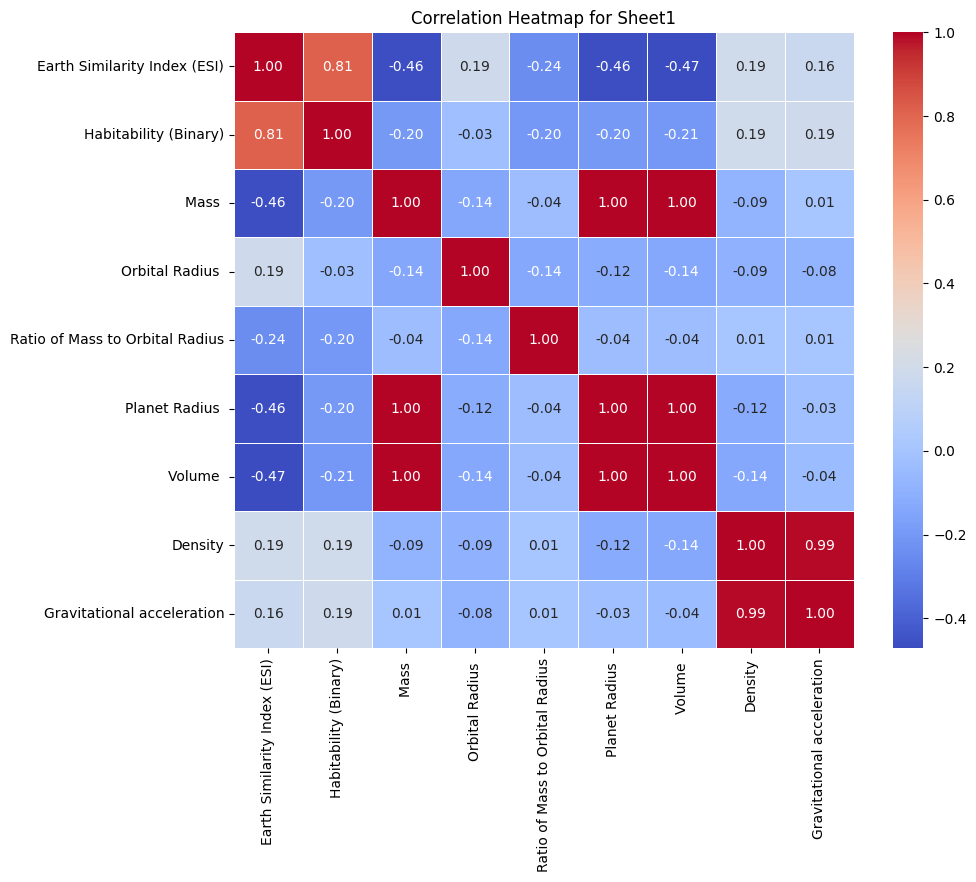

In [23]:
visualize_dataset_with_heatmap(dataset)

# Heatmap Visualization  

## Heatmap Color Scale  
- **Red** represents a **positive correlation** (closer to +1).  
- **Blue** represents a **negative correlation** (closer to -1).  
- **White/Neutral colors** indicate no strong correlation (close to 0).  

## Heatmap Analysis  
Since our target variable is habitability, we aim to identify the strongest correlation.  

### ESI  
- ESI is highly correlated with habitability, which is normal since habitability directly affects ESI.  
- ESI and planet radius are negatively correlated. Thus, the bigger the planet, the lower the ESI. So, the habitability probability of planets with a larger radius is lower.  
- ESI and volume are also negatively correlated, which suggests that larger planetary volumes are associated with lower ESI values.  

### Mass  
- Since mass and ESI are negatively correlated, the likelihood of a high ESI value on a massive planet is low. Thus, heavier planets tend to have lower ESI values. This is also true for habitability.  

### Orbital Radius  
- Orbital radius is a crucial feature in the context of planet habitability. However, surprisingly, most of the data, including habitability, are not highly correlated.  

### Planet Radius  
- This feature could be classified as a key factor in identifying habitable planets, as it is negatively correlated with both ESI and habitability.  

### Density  
- The reason behind the high correlation between density and gravitational force comes from the formula itself:  

  \[
  V = \frac{4}{3} \pi r^3
  \]  

  Since volume **\(V\)** depends on the cube of the radius **\(r\)**, any correlation involving density and gravitational force is inherently linked to this mathematical relationship. Thus, it cannot be classified as a vital or emphasized factor.  
